In [1]:
# Load the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Input

In [2]:
# Load the dataset
data = pd.read_csv('AAPL.csv')

# Display the first and last few rows of the dataset
print(data.head())
print(data.tail())


         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600
             Date        Open        High         Low       Close   Adj Close  \
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
10463  122207100  
10464   84784300  


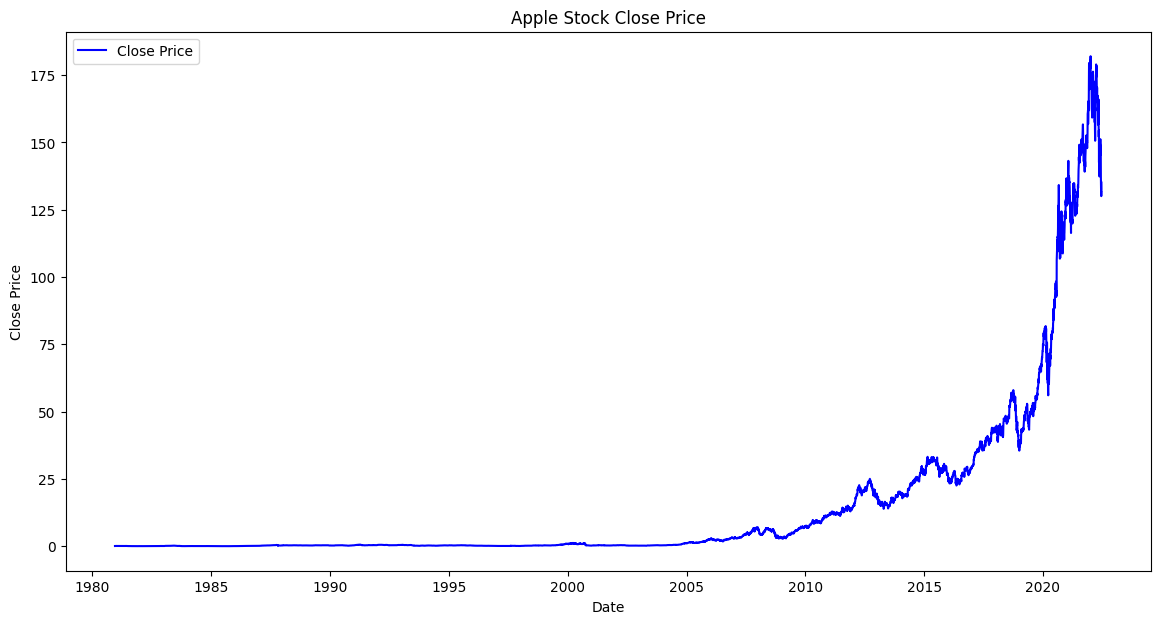

C:\Users\jovan\AppData\Local\Programs\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 8.5197e-04
Epoch 2/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 1.2674e-04
Epoch 3/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 6.4825e-05
Epoch 4/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 5.5987e-05
Epoch 5/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 5.8319e-05
Epoch 6/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 5.4348e-05
Epoch 7/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 4.7860e-05
Epoch 8/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 3.7366e-05
Epoch 9/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 3.6491e-05
Epoch 10/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 3.9526e-05
Epoch 11/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 3.8036e-05
Epoch 12/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 2.4176e-05
Epoch 13/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 2.5208e-05
Epoch 14/75
314/314 ━━━━━━━━━━━━━━━━━━━━ 15s 48

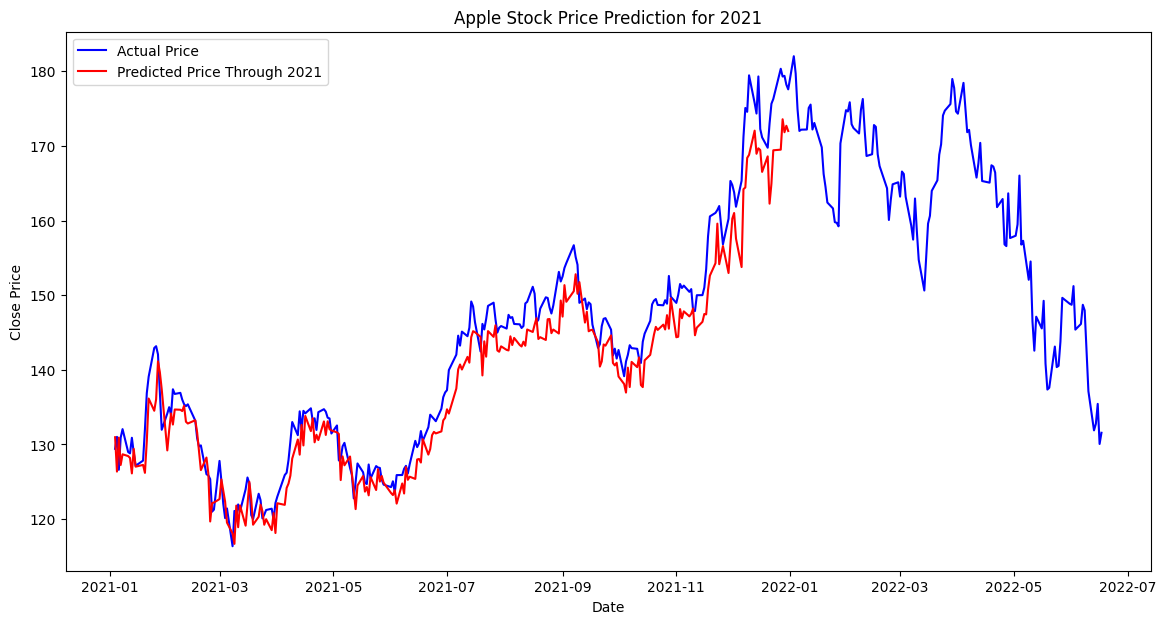

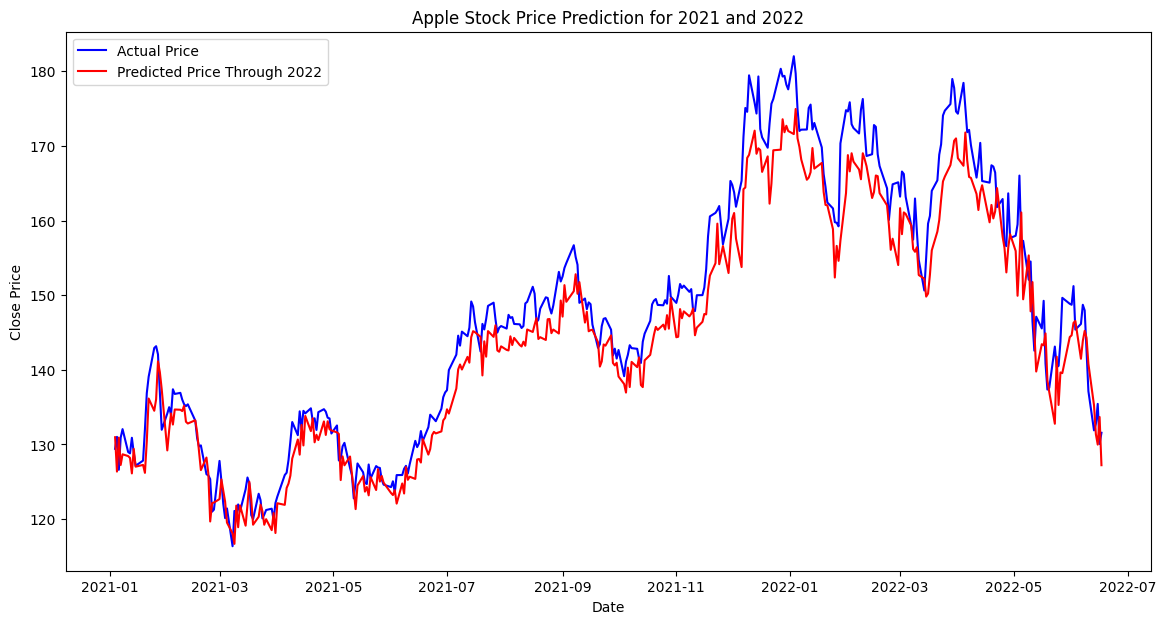

In [3]:
# Convert the loaded data into a dataframe
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date to ensure the data is in chronological order
df = df.sort_values('Date')

# Plot the full dataset
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Close Price')
plt.legend()
plt.show()

# Prepare the data for training and testing before/on or after the specified date respectively
train_data = df[df['Date'] <= '2020-12-31'].copy()
test_data = df[df['Date'] > '2020-12-31'].copy()

# Normalize the features for training and testing sets
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled_data = scaler.fit_transform(train_data[['Open', 'High', 'Low', 'Close', 'Volume']])
test_scaled_data = scaler.transform(test_data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Create the training data in sequences of 63 trading days equivalent to 3 calendar months
# Can be adjusted to years or whatever timeframe is needed (21 trading days  = 1 calendar month)
x_train, y_train = [], []
for i in range(63, len(train_scaled_data)):
    x_train.append(train_scaled_data[i-63:i, [0, 1, 2, 4]])  # Excluding the 'Close' column for x_train
    y_train.append(train_scaled_data[i, 3])  # Predicting the 'Close' price only

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

# Build the LSTM model
model = Sequential()
input_shape = (x_train.shape[1], x_train.shape[2])  # Input layer
model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape)) # LSTM layers with 50 units 1
model.add(LSTM(units=50, return_sequences=False))  # LSTM layers with 50 units 2
model.add(Dense(units=25))  # Fully connected dense layer wit h25 units 
model.add(Dense(units=1))  # Output layer

# Compile the model using the Adam optimizer and mean squared error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data for 75 epochs with a batch size of 32.
model.fit(x_train, y_train, epochs=75, batch_size=32)

# Preparing test data
x_test = []
y_test = test_data['Close'].values

# Use the last 63 days from the training data to start the sequence for the test data
initial_sequence = train_scaled_data[-63:, :]  # Include all columns including 'Close'

# Concatenate the initial sequence with the test data to form the test sequences
full_test_data = np.concatenate((initial_sequence, test_scaled_data), axis=0)

for i in range(63, len(full_test_data)):
    x_test.append(full_test_data[i-63:i, [0, 1, 2, 4]])  # Excluding the 'Close' column for x_test

x_test = np.array(x_test)

# Predicting the prices then inverse transformed to their original scale
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 3)), predictions, np.zeros((predictions.shape[0], 1))), axis=1))[:, 3]

# Calculate the root mean squared error of the predictions, providing a measure of how well the model performs.
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting the actual vs predicted prices for 2021
end_of_2021 = '2021-12-31'  # Define cutoff date
test_data_2021 = test_data[test_data['Date'] <= end_of_2021]  # Filter the test prediction data to only include 2021
predictions_2021 = predictions[:len(test_data_2021)]  # Filter the test prediction data to only include 2021
plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Close'],color='blue', label='Actual Price')
plt.plot(test_data_2021['Date'], predictions_2021, color='red', label='Predicted Price Through 2021')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Prediction for 2021')
plt.legend()
plt.show()


# Plotting the actual vs predicted prices for 2021 and 2022
end_of_2022 = '2022-12-31'  # Define cutoff date
test_data_2022 = test_data[test_data['Date'] <= end_of_2022]  # Filter the test prediction data to only include 2021
predictions_2022 = predictions[:len(test_data_2022)]  # Filter the test prediction data to only include 2021
plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Close'], color='blue', label='Actual Price')
plt.plot(test_data_2022['Date'], predictions_2022, color='red', label='Predicted Price Through 2022')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Prediction for 2021 and 2022')
plt.legend()
plt.show()



In [6]:
Interpretations ='''

Complete the steps below, then write a comprehensive technical report as a Python Jupyter notebook (to include all code, code comments, 
all outputs, plots, and analysis). Make sure the project documentation contains 
a) Problem Statement:

Accurately predicting stock prices in mercurial financial markets is a very challenging task, but if successful it can be very lucrative for 
investors, analysts, and financial institutions. The rise of advanced machine learning techniques like Recurrent Neural Networks (RNNs) and 
Long Short-Term Memory (LSTM) models has spurred a growing interest in leveraging these technologies to enhance the accuracy of stock price 
predictions and investing performance.

The primary goal of this assignment is to build and evaluate an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock. By 
utilizing historical stock data, the LSTM model will be trained to learn patterns and trends within the time series data. The assignment 
aims to achieve the following specific objectives:

- Predicting 2021 Stock Prices: Develop an LSTM model capable of accurately forecasting Apple’s stock prices for the year 2021. The model will 
  be trained using historical data up to the end of 2020 and evaluated based on its performance in predicting the actual stock prices in 2021.

- Extending Predictions to 2022: Assess the model’s capability to generalize by predicting stock prices for the year 2022. This will help in 
  understanding the model's robustness and its ability to capture long-term trends.

- Model Evaluation and Analysis: Evaluate the model’s performance using the Root Mean Squared Error (RMSE) metric and compare the predicted 
  stock prices against actual prices. Analyze the results to determine the model’s accuracy and identify potential areas for improvement.

- Visualization and Interpretation: Visualize the historical stock prices along with the predicted prices for both 2021 and 2022. Provide a 
  comprehensive analysis of the model’s predictions to facilitate better understanding and decision-making.

- This assignment aims to both build an effective predictive model for stock prices and to demonstrate the practical application of LSTM networks 
  in financial forecasting. The insights gained from this assignment could be beneficial for stakeholders in making informed investment decisions 
  and enhancing trading strategies.

b) Algorithm of the solution:
   Completed: All code added to the Jupyter Notebook.
   
c) Analysis of the findings:

Loss Over Epochs:
The training loss decreases significantly over the epochs, starting from 8.5197e-04 in the first epoch to 1.9784e-05 in the 75th epoch. This 
indicates that the model is learning well and the error is reducing with each epoch.

Root Mean Squared Error (RMSE):
The RMSE of the model on the test data is 4.6816. RMSE measures the average magnitude of the errors between the predicted and actual values and 
a lower RMSE indicates better performance. The RMSE value suggests that the model's predictions are reasonably accurate, but there is still some 
room for improvement. 

Model Accuracy:
The model's accuracy can be determined from the low RMSE value, indicating that the model's predictions are close to the actual values. The 
visual comparison between the predicted and actual prices on the plots further supports this because the predicted prices track closely to the 
actual prices over 2021 and 2022. 

Potential Improvements:
Increase Training Epochs: Training the model for more epochs might further reduce the loss and improve accuracy as seen with a lower RMSE.
Parameter Tuning: Experimenting with different parameters (i.e. the number of LSTM layers, the number of LSTM units for each layer, learning rate, 
batch size) could help in finding a better configuration that enhances the model's performance.
Feature Engineering: Including additional relevant features (i.e. technical indicators, external economic indicators, news stories) might improve 
the model's predictive power.
Ensemble Methods: Combining predictions from multiple models could potentially improve accuracy by reducing overfitting and capturing more patterns 
in the data.
Longer Sequences: Using longer sequences (more than 63 days) might help the model capture more long-term dependencies in the data.

Overall Functioning of the RNN:
Architecture: The LSTM model consists of an input layer with 4 inputs (open, high, low, and volume), two LSTM layers (50 units each) followed by 
a Dense layer of 25 units and finally a last dense output layer with 1 unit. LSTM layers are effective in capturing time dependencies, making them 
suitable for time-series prediction tasks as is present in stock market data. 
Training: The model is trained on sequences of 63 trading days, which allows it to learn patterns and trends in the stock prices over roughly three 
months. The model is evaluated using RMSE, which indicates how accurately the model predicts prices. 

'''


In [7]:
References ='''

References:

Nagadia, M. (2021). Apple stock price from 1980-2021 [Data set]. Kaggle. 
Retrieved from https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021

Moghar, A., & Hamiche, M. (2020). Stock market prediction using LSTM recurrent neural network. 
In International Workshop on Statistical Methods and Artificial Intelligence (IWSMAI 2020) (pp. 452-457). Elsevier. 
Retrieved from https://www.sciencedirect.com/science/article/pii/S1877050920304865

Stack Overflow. (n.d.). Retrieved January, 2024, from https://stackoverflow.com/

Reddit. (n.d.). Retrieved January, 2024, from https://www.reddit.com/

GitHub. (n.d.). Retrieved January, 2024, from https://www.github.com/

Towards Data Science. (n.d.). Retrieved January, 2024, from https://towardsdatascience.com/

DataCamp Community. (n.d.). Retrieved January, 2024, from https://www.datacamp.com/community

Scikit-learn. (n.d.). Support vector machines. Retrieved from https://scikit-learn.org/stable/modules/svm.html

Aggarwal, C. (2018). Neural networks and deep learning. Springer. ISBN-13: 9783319944623

'''